In [1]:
from meta_opt.utils.experiment_utils import make, process_results, bcolors, plot, get_final_cparams

import os
import matplotlib.pyplot as plt
from IPython.display import HTML
import itertools
import dill as pkl

/Users/evandogariu/Desktop/meta-opt/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
# configuration
CFG = {
    # training options are None because we arent training :)
    'workload': None,
    'num_iters': None,
    'eval_every': None,
    'num_eval_iters': None,
    'batch_size': None,
    'full_batch': True,
    'reset_every': None,

    # experiment options
    'experiment_name': None,
    'load_checkpoint': True,
    'overwrite': False,  # whether to allow us to overwrite existing checkpoints or throw errors
    'directory': os.path.abspath("../"),
}

def append_results(processed_results, experiment_name):
    baseline_results = pkl.load(open('{}/data/{}_processed.pkl'.format(CFG['directory'], experiment_name), 'rb'))
    r = {}
    for k in baseline_results.keys(): 
        r[k] = baseline_results[k]
        if k not in processed_results: continue
        for _k, _v in processed_results[k].items():
            r[k][_k] = _v
    return r

# MNIST stochastic

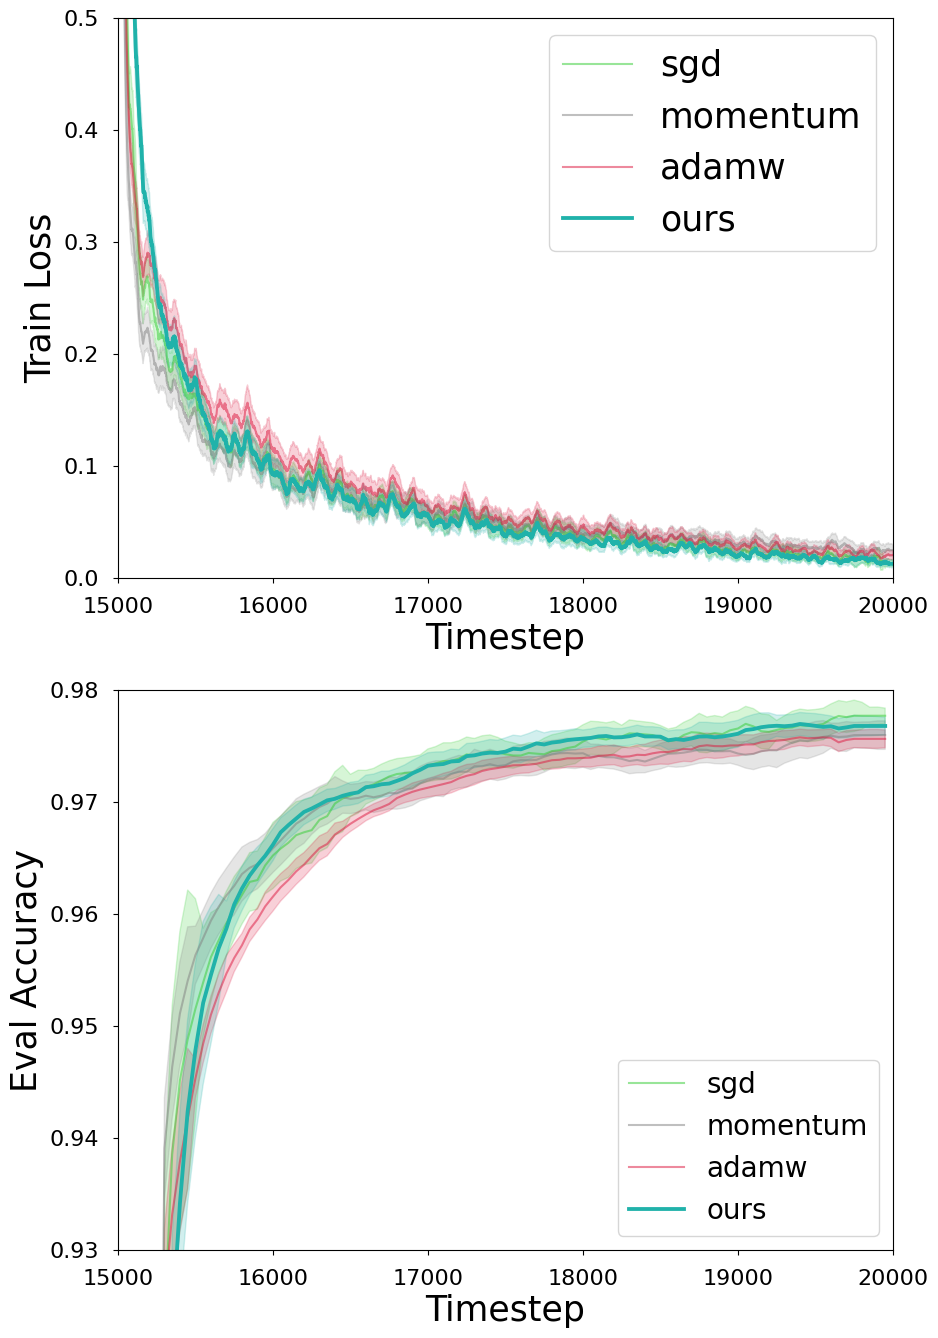

In [12]:
# load
CFG['experiment_name'] = 'mnist'
# baselines = ['mnist_baselines', 'mnist_pretrained']
baselines = []

# plot
keys_to_plot = {
    'sgd': 'sgd',
    'momentum': 'momentum',
    'adamw': 'adamw',
    'metaopt_cf_long_noadam': 'ours',
    # 'metaopt_ncf_quick': 'ours (noncounterfactual)',
}
# keys_to_plot = '.*'  # anything

plots_to_make = {
              'loss': 'Train Loss',
              # 'eval_loss': 'Eval',
              'eval_acc': 'Eval Accuracy',
}
processed_results = pkl.load(open('{}/data/{}_processed.pkl'.format(CFG['directory'], CFG['experiment_name']), 'rb'))
for b in baselines: processed_results = append_results(processed_results, b)
    
(fig, ax), anim = plot(None, processed_results, keys_to_plot, plots_to_make, 
                       anim_bounds=None, smoothing={'loss': 40, 'eval_acc': 10}, highlight_baselines=True, fontsize=25, legend_location='upper right')
ax[0].set_ylim(0, 0.5)
ax[0].set_xlim(15000, 20000)
ax[1].set_xlim(15000, 20000)
ax[1].set_ylim(0.93, 0.98)
ax[1].legend(loc='lower right', fontsize=20)
plt.savefig('{}/figs/{}.png'.format(CFG['directory'], 'mnist_stochastic_simple'))
plt.show()

# MNIST fullbatch

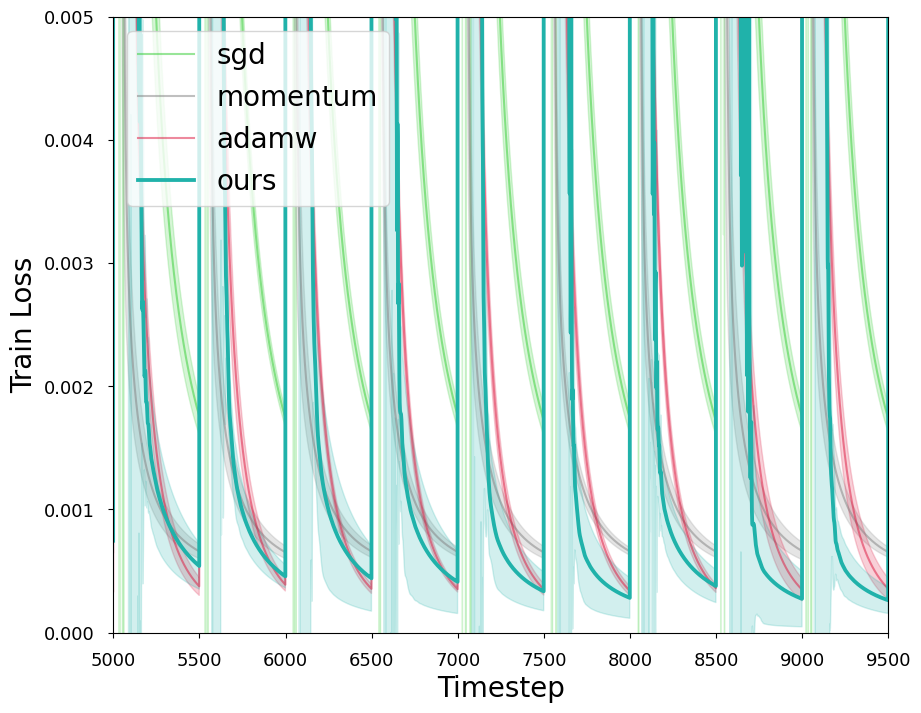

In [13]:
# load
CFG['experiment_name'] = 'mnist_fullbatch'
baselines = []
# baselines = ['mnist_baselines_fullbatch', 'mnist_pretrained']

# plot
keys_to_plot = {
    'sgd': 'sgd',
    'momentum': 'momentum',
    # 'hgd': 'hgd',
    'adamw': 'adamw',
    'cf': 'ours',
    # 'ncf': 'ours (noncounterfactual)',
}

plots_to_make = {
              'loss': 'Train Loss',
              # 'M': 'Learned Coefficients',
              # 'grad_sq_norm': 'Sq Grad Norm',
              # 'proj_grad_sq_norm': 'Proj Sq Grad Norm',
}

processed_results = pkl.load(open('{}/data/{}_processed.pkl'.format(CFG['directory'], CFG['experiment_name']), 'rb'))
for b in baselines: processed_results = append_results(processed_results, b)
    
(fig, ax), anim = plot(None, processed_results, keys_to_plot, plots_to_make, 
                       anim_bounds=None, smoothing=None, highlight_baselines=True, fontsize=20, legend_location='upper left')
ax[0].set_ylim(0, 0.005)
ax[0].set_xlim(5000, 9500)
# ax[1].set_xlim(0, 31)
# ax[1].set_ylim(-0.1, 0.005)
# ax[1].legend(loc='lower right', fontsize=20)
# plt.savefig('{}/figs/{}.pdf'.format(CFG['directory'], 'mnist_fullbatch_simple'))
plt.show()

# CIFAR stochastic

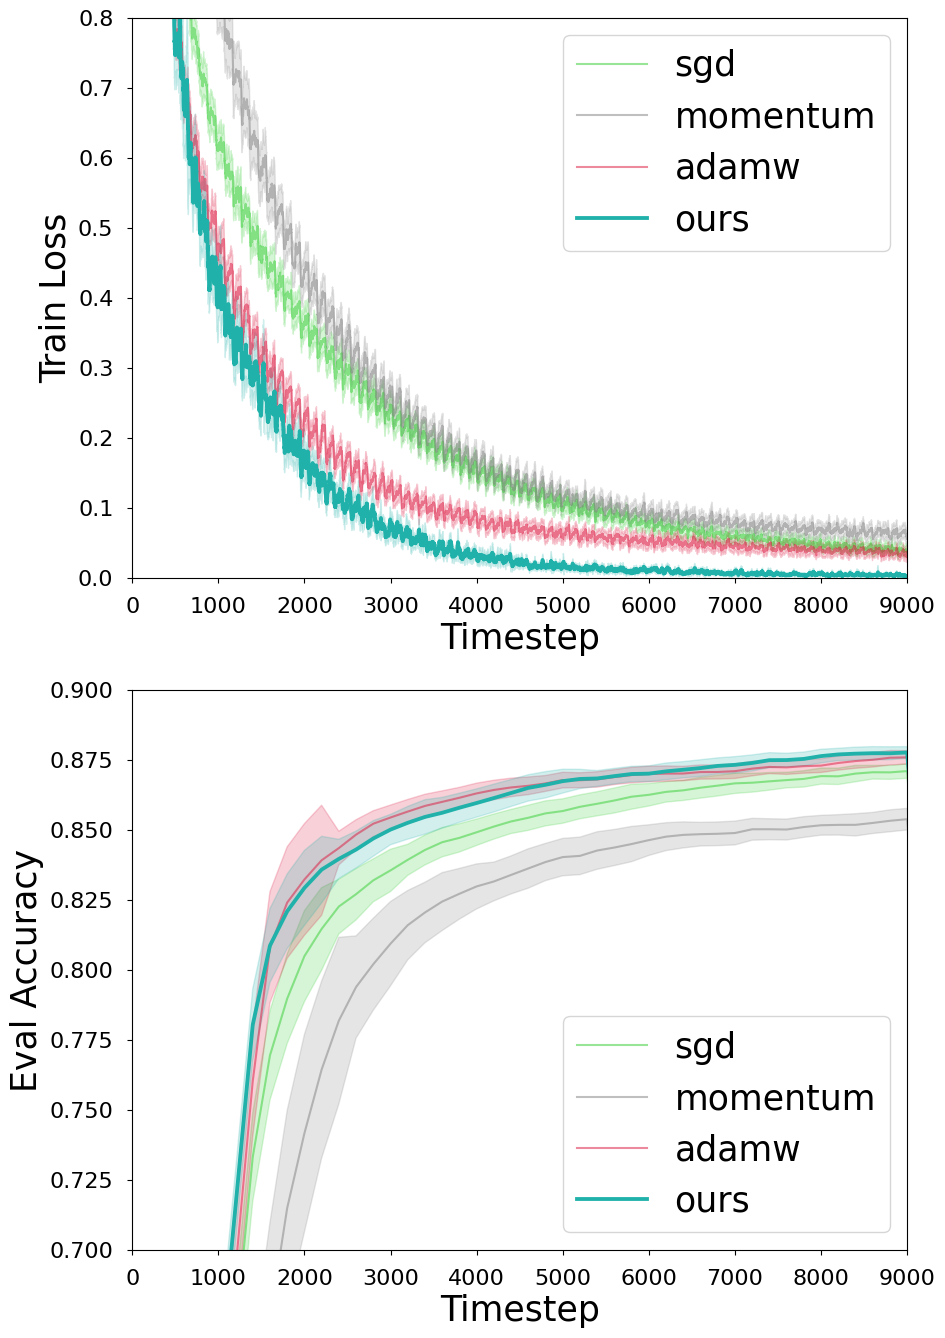

In [60]:
# load
CFG['experiment_name'] = 'cifar_pretrained'
baselines = []

# plot
keys_to_plot = {
    'sgd': 'sgd',
    'momentum': 'momentum',
    # 'hgd': 'hgd',
    'adamw': 'adamw',
    'frozen': 'ours',
    # 'cf': 'ours (unfrozen)',
    # 'ncf': 'ours (noncounterfactual)',
}

plots_to_make = {
              'loss': 'Train Loss',
              # 'eval_loss': 'Eval Loss',
              'eval_acc': 'Eval Accuracy',
}

processed_results = pkl.load(open('{}/data/{}_processed.pkl'.format(CFG['directory'], CFG['experiment_name']), 'rb'))
for b in baselines: processed_results = append_results(processed_results, b)

(fig, ax), anim = plot(None, processed_results, keys_to_plot, plots_to_make, 
                       anim_bounds=None, smoothing={'loss': 10, 'eval_acc': 10}, highlight_baselines=True, fontsize=25, legend_location='upper right')
ax[0].set_ylim(0, 0.8)
ax[0].set_xlim(0, 9000)
ax[1].set_xlim(0, 9000)
ax[1].set_ylim(0.70, 0.90)
ax[1].legend(loc='lower right', fontsize=25)
# plt.savefig('{}/figs/{}.png'.format(CFG['directory'], 'cifar_stochastic_simple_bad'))
plt.show()

# CIFAR fullbatch

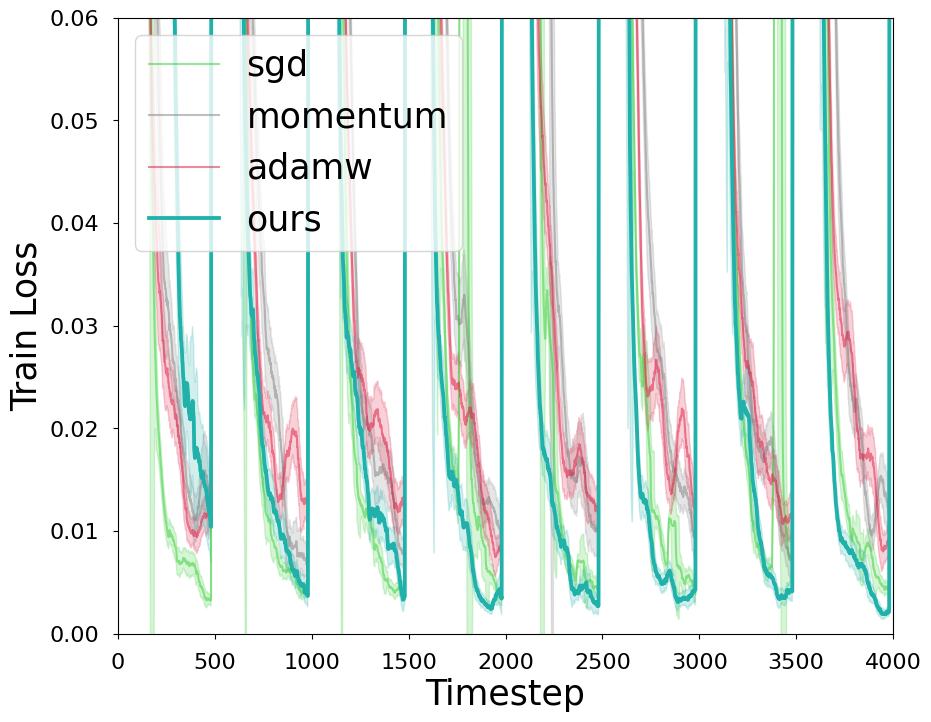

In [39]:
# load
CFG['experiment_name'] = 'cifar_fullbatch'
baselines = []

# plot
keys_to_plot = {
    'sgd': 'sgd',
    'momentum': 'momentum',
    # 'hgd': 'hgd',
    'adamw': 'adamw',
    'cf': 'ours',
}

plots_to_make = {
              'loss': 'Train Loss',
              # 'M': 'Learned Coefficients',
              # 'grad_sq_norm': 'Sq Grad Norm',
              # 'proj_grad_sq_norm': 'Proj Sq Grad Norm',
}

processed_results = pkl.load(open('{}/data/{}_processed.pkl'.format(CFG['directory'], CFG['experiment_name']), 'rb'))
for b in baselines: processed_results = append_results(processed_results, b)

(fig, ax), anim = plot(None, processed_results, keys_to_plot, plots_to_make, M0_initial=0.1,
                       anim_bounds=None, smoothing=40, highlight_baselines=True, fontsize=25, legend_location='upper left')
ax[0].set_ylim(0, 0.06)
ax[0].set_xlim(0, 4000)
# ax[1].set_xlim(0, 31)
# ax[1].set_ylim(-0.18, 0.06)
# ax[1].legend(loc='lower right', fontsize=20)
plt.savefig('{}/figs/{}.png'.format(CFG['directory'], 'cifar_fullbatch_simple'))
plt.show()

# WMT stochastic

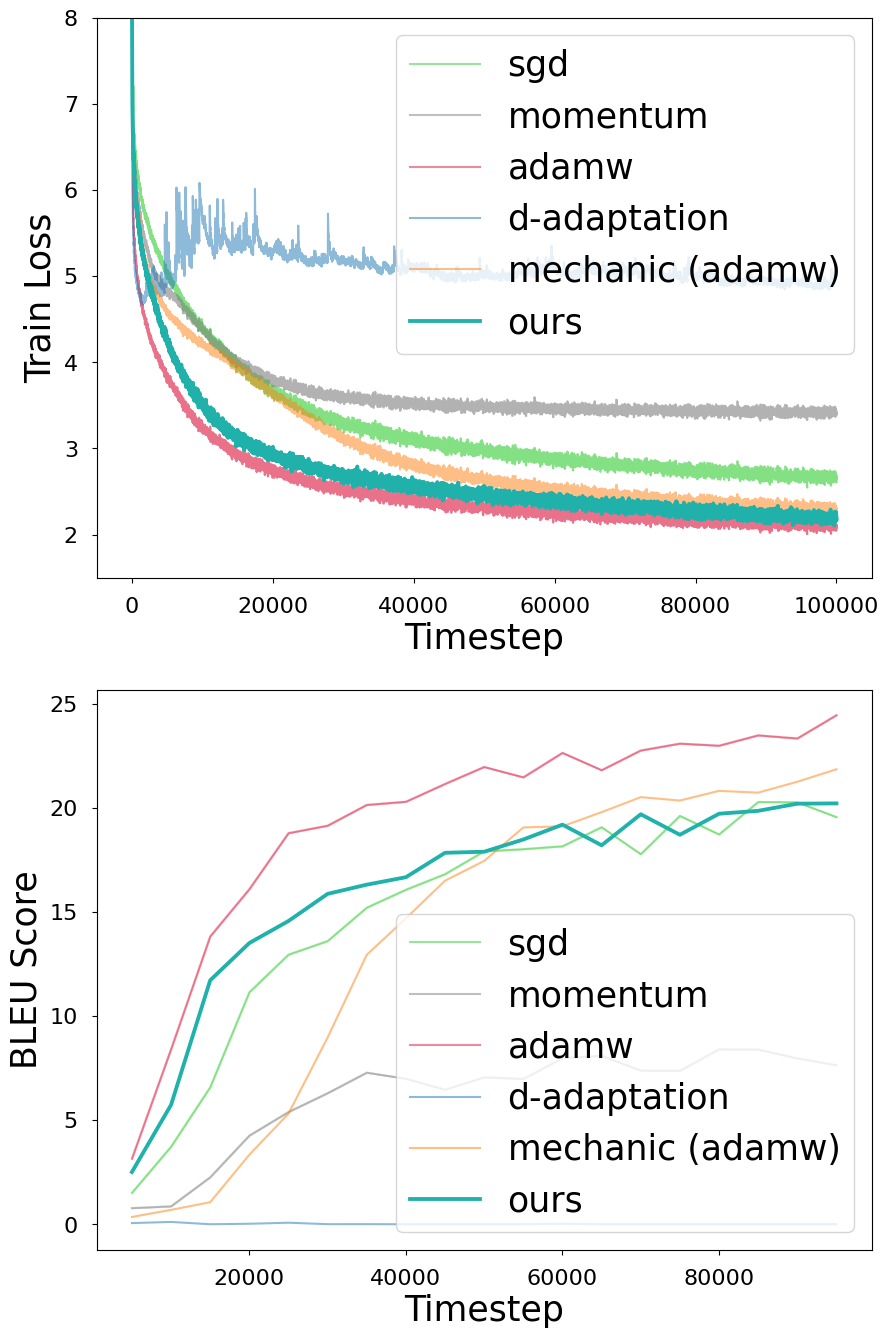

In [56]:
# load
CFG['experiment_name'] = 'wmt_pretrained'
baselines = ['wmt_base_baselines']
# baselines = ['wmt_base_baselines', 'wmt_pretrained_cf_3']

# plot
keys_to_plot = {
    'sgd_2.0': 'sgd',
    'momentum_0.3': 'momentum',
    'adamw': 'adamw',
    # 'rsqrt_0.002': 'rsqrt',
    'dadamw': 'd-adaptation',
    'mechadamw': 'mechanic (adamw)',
    'frozen_wmt_fullbatch_clip/cf_adam_6e-4_clip=1.0[-1]': 'ours',
    # 'ncf': 'ours',
}
# keys_to_plot = '.*'

plots_to_make = {
              'loss': 'Train Loss',
              # 'eval_loss': 'Eval Loss',
              # 'eval_acc': 'Eval Accuracy',
              'bleu': 'BLEU Score',
}

processed_results = pkl.load(open('{}/data/{}_processed.pkl'.format(CFG['directory'], CFG['experiment_name']), 'rb'))
for b in baselines: processed_results = append_results(processed_results, b)

(fig, ax), anim = plot(None, processed_results, keys_to_plot, plots_to_make, 
                       anim_bounds=None, smoothing={'loss': 20, 'bleu': None}, highlight_baselines=True, fontsize=25, legend_location='upper left')
ax[0].set_ylim(1.5, 8)
ax[0].legend(loc='upper right', fontsize=25)
# ax[1].legend(loc='upper right', fontsize=20)
ax[1].legend(loc='lower right', fontsize=25)
# ax[3].legend(loc='lower right', fontsize=20)
# plt.savefig('{}/figs/{}.png'.format(CFG['directory'], 'wmt_stochastic_simple'))
plt.show()

# WMT fullbatch

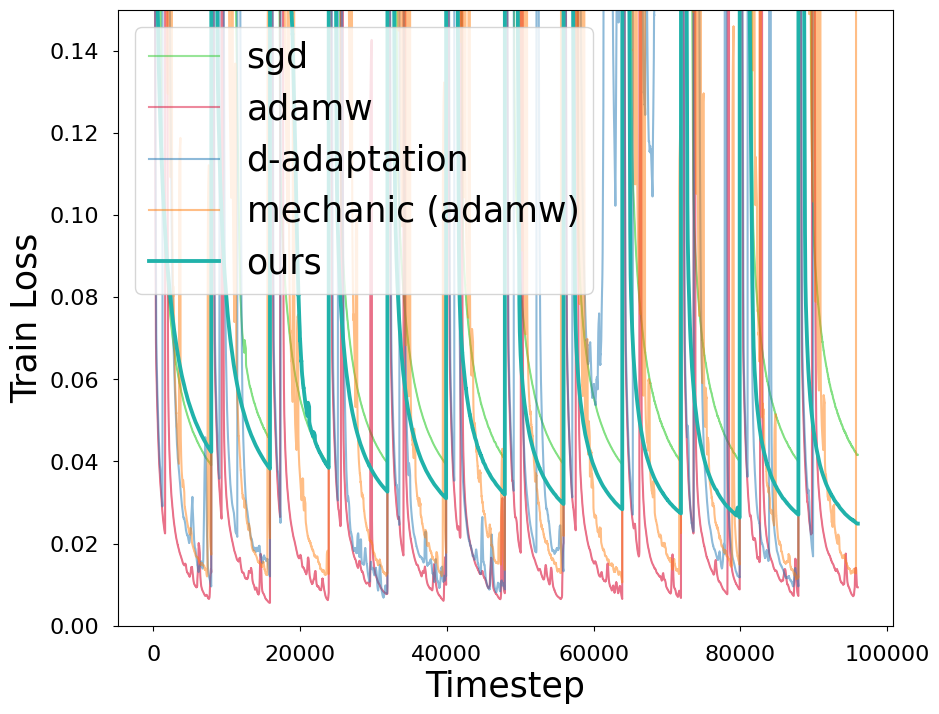

In [50]:
# load
CFG['experiment_name'] = 'wmt_fullbatch'
baselines = ['wmt_fullbatch_clip',]

# plot
keys_to_plot = {
    'sgd': 'sgd',
    'momentum_0.3': 'momentum',
    'adamw': 'adamw',
    'dadamw': 'd-adaptation',
    'mechadamw': 'mechanic (adamw)',
    'cf_adam_6e-4_clip=1.0': 'ours',
}
# keys_to_plot = '.*'

plots_to_make = {
              'loss': 'Train Loss',
              # 'M': 'Learned Coefficients',
              # 'grad_sq_norm': 'Sq Grad Norm',
              # 'proj_grad_sq_norm': 'Proj Sq Grad Norm',
}

processed_results = pkl.load(open('{}/data/{}_processed.pkl'.format(CFG['directory'], CFG['experiment_name']), 'rb'))
for b in baselines: processed_results = append_results(processed_results, b)

(fig, ax), anim = plot(None, processed_results, keys_to_plot, plots_to_make, M0_initial=1.0,
                       anim_bounds=None, smoothing=200, highlight_baselines=True, fontsize=25, legend_location='upper left')
ax[0].set_ylim(0, 0.15)
# ax[1].set_xlim(0, 15)
# ax[1].set_ylim(-1.7, 0.2)
# ax[1].legend(loc='lower right', fontsize=20)
plt.savefig('{}/figs/{}.png'.format(CFG['directory'], 'wmt_fullbatch_simple'))
plt.show()

# spare code

## Load

In [27]:
# load
CFG['experiment_name'] = 'wmt_cf_2'

results = make(CFG)  # save to temp var `_results` so that we dont immediately overwrite `results` in case somethings wrong
# processed_results = process_results(CFG, results)

# results = None
processed_results = pkl.load(open('{}/data/{}_processed.pkl'.format(CFG['directory'], CFG['experiment_name']), 'rb'))

# processed_results = append_results(processed_results, 'wmt_base_baselines')
# processed_results = append_results(processed_results, 'wmt_fullbatch')
# processed_results = append_results(processed_results, 'wmt_pretrained_cf_3')

using cpu for jax
results will be stored at: /Users/evandigiorno/Desktop/meta-opt/data/wmt_cf_2_*.pkl
we will try to load experiment checkpoint first
	loaded checkpoint from /Users/evandigiorno/Desktop/meta-opt/data/wmt_cf_2_raw.pkl, containing ['cf_adam_1e-4_clip=0.5', 'adam_cf_adam_4e-4']
note: using full_batch means we will never eval


## Plot
Plot and also animate the values taken by the $\{M_h\}_{h=1}^H$ coefficients during training. Each $M_h$ multiplies a disturbance from $h$ training steps ago (i.e. 0 is most recent in this plot).

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


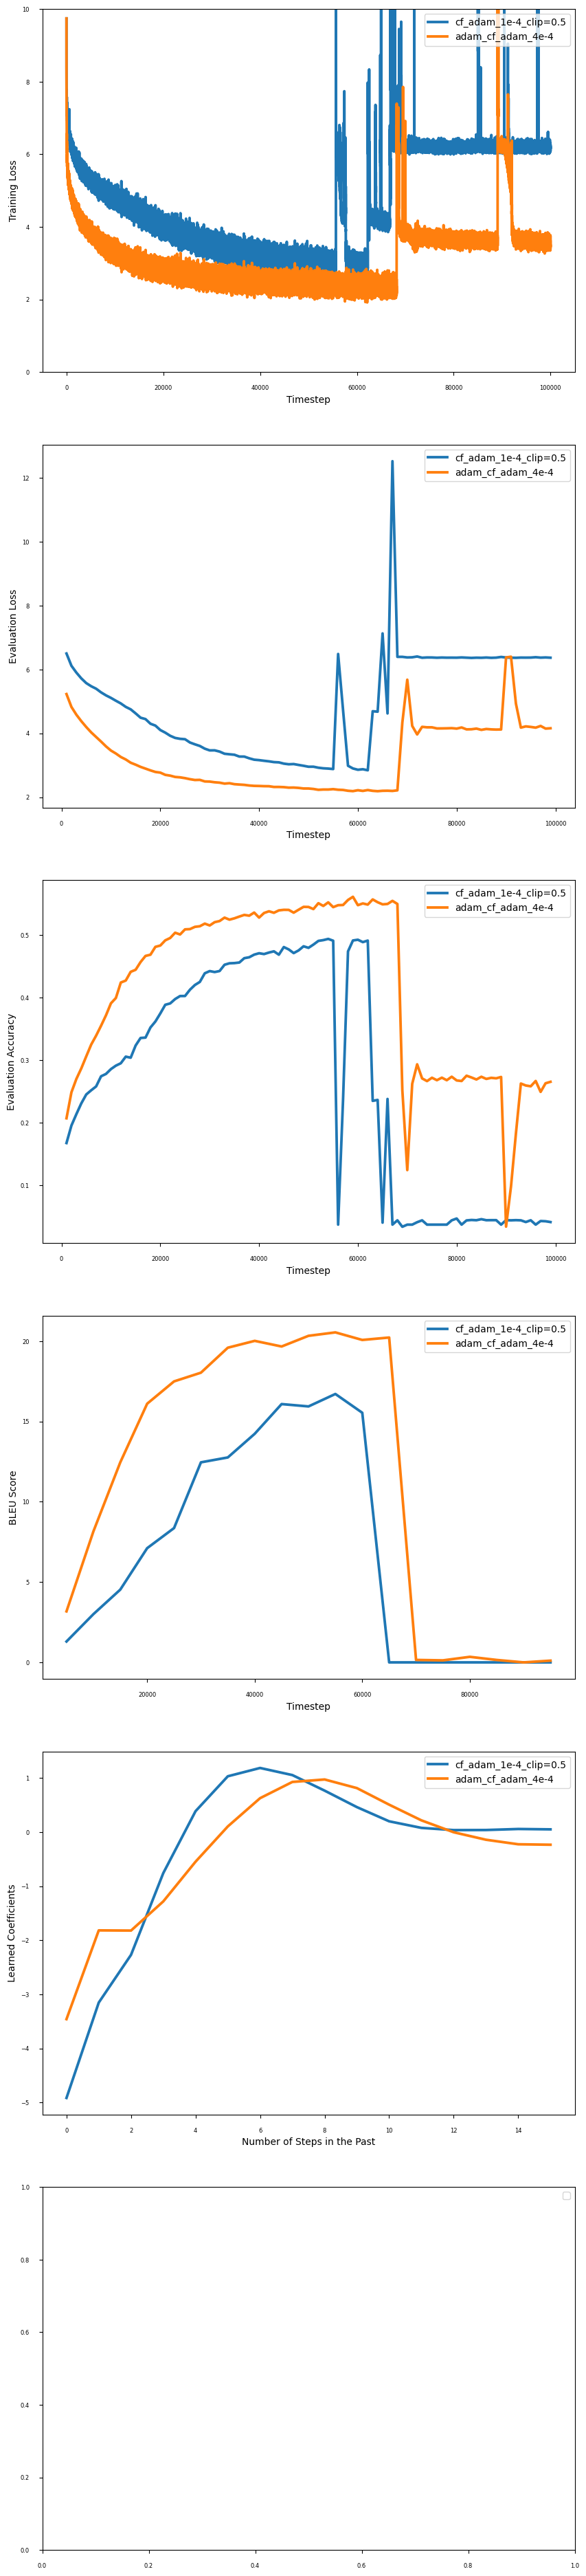

In [28]:
# ----------------------------------------
# plot a particular set of experiments
# ----------------------------------------
keys_to_plot = {
    'sgd': 'sgd',
    'momentum': 'momentum',
    'adamw': 'adamw',
    'dadamw': 'd-adap',
    # 'mechadamw': 'mechanic',
    # 'rmsprop',
    'hgd': 'hgd',
    'frozen': 'ours (frozen)',
    'cf': 'ours (finetuned)',
    'ncf': 'ours (noncounterfactual)',
    
    # custom ones
    'sgd_2.0': 'sgd',
    'momentum_0.3': 'momentum',
    'adam_cf_adam_6e-4': 'ours',
    'frozen_wmt_fullbatch_clip/cf_adam_6e-4_clip=1.0[-1]': 'ours (frozen)',
    'rsqrt_0.002': 'rsqrt',
    
}

plots_to_make = {
              'loss': 'Training Loss',
              'eval_loss': 'Evaluation Loss',
              'eval_acc': 'Evaluation Accuracy',
              'bleu': 'BLEU Score',
              'M': 'Learned Coefficients',
              'anim': 'Animation',
              # 'param_sq_norm': 'Sq Param Norm',
              # 'grad_sq_norm': 'Sq Grad Norm',
              # 'proj_grad_sq_norm': 'Proj Sq Grad Norm',
               # 'lr': 'Learning Rate',
}

# ----------------------------------------
# OR just plot em via regex
# ----------------------------------------
# keys_to_plot = '.*mech.*'  # specific regex
keys_to_plot = '.*'  # anything

# from copy import deepcopy
# import numpy as np
# q = deepcopy(processed_results)
# T = 58000
# q['loss']['sgd']['t'] = np.array(q['loss']['sgd']['t']) + T
# (fig, ax), anim = plot(results, q, keys_to_plot, plots_to_make, anim_bounds=(-1.5, 0.5), smoothing=None)
# del q

(fig, ax), anim = plot(results, processed_results, keys_to_plot, plots_to_make, anim_bounds=(-5, 2), smoothing=None)
ax[0].set_ylim(0, 10)
# ax[0].set_xlim(T, T + 2000)
# ax[1].set_ylim(0.6, 0.95)
# ax[2].set_ylim(0.95, 0.99)
# ax[3].set_ylim(0.95, 0.99)
# ax[4].set_ylim(0, 1)
# ax[1].set_ylim(0, 0.01)

# import matplotlib
# matplotlib.rcParams.update({'font.size': 12})



# plt.savefig('{}/figs/{}.pdf'.format(CFG['directory'], CFG['experiment_name']))
plt.show()

if anim is not None:
    h = HTML(anim.to_html5_video())
    display(h)

In [11]:
import matplotlib.pyplot as plt
M = processed_results['M']['cf_wmt_fullbatch_clip/cf_adam_6e-4_clip=1.0[-1]']['avg'][0]
M = M[::-1]
M[0] -= 1.0
plt.plot(range(16), M, linewidth=0.9)

KeyError: 'cf_wmt_fullbatch_clip/cf_adam_6e-4_clip=1.0[-1]'